<a href="https://colab.research.google.com/github/akr1139/Optimization/blob/main/E17285_EM502_LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E/17/285

### RATHNAYAKA R.M.A.K.

### EM502: OPTIMIZATION - LAB05

## LAB 01

In [215]:
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.lines as mlines
import numpy as np
from scipy import optimize as opt

##  Q1)
Optimality conditions for Constrained Nonlinear Optimization Problems(CNOP) and KKT conditions.

I. Consider the following nonlinear constrained optimization problem.
$$
\begin{array}{cl}
\underset{x_1, x_2}{\operatorname{minimize}} & f\left(x_1, x_2\right)=-x_1 \\
\text { subject to } & g_1\left(x_1, x_2\right)=x_2-\left(1-x_1\right)^3 \leq 0 \\
& g_2\left(x_1, x_2\right)=-x_2 \leq 0
\end{array}
$$

a) Using the helper functions provided determine if this problem admits Lagrange multipliers.

b) Can you write the gradient of the objective function as a linear combination of the gradients of the constraints?Why?

### 1

In [216]:
# Define the Lagrangian and its gradient
import sympy as sym
from sympy import pprint, latex, root
from IPython.display import display, Latex

# 1.Symbols and Definitions:

# x1 & x2 are defined as symbolic variables using 'sym.Symbol'.
# Lagrange multipliers (m1 & m2) are also defined as symbolic variables.
x1, x2, m1, m2 = sym.symbols("x1 x2 m1 m2")

# The objective function f is defined as -x.
f = -x1
# The constraints g1 & g2 are defined respectively.
g1 = x2 - (1-x1)**3
g2 = -x2
# The Lagrangian L is defined as the sum of the objective function and the constraints multiplied by their respective Lagrange multipliers.
L = f + m1*g1 + m2*g2

# 2. Displaying the Lagrangian:
# This shows the Lagrangian equation in LaTeX format.
display(Latex(r"$L=$"),L)
# print(latex(L))

# -------------------------------------------------------------------------------------------------------------------------
# 3. Calculating and Displaying the Gradient of the Lagrangian:
dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)]])
# - The gradient of the Lagrangian  is displayed using 'display (Latex (r"\$|nabla L=\$"), dL).
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

# -------------------------------------------------------------------------------------------------------------------------
# 4. KKT Conditions and Solution:
# The Karush-Kuhn-Tucker (KKT) conditions are derived
kkt = (sym.diff(L,x1), sym.diff(L,x2), m1*g1, m2*g2)
# The 'sym. solve' function is used to solve the KKT conditions for x1,x2,m1,m2
sol = sym.solve(kkt,(x1,x2,m1,m2), dict=True)
display(sol)


<IPython.core.display.Latex object>

m1*(x2 - (1 - x1)**3) - m2*x2 - x1

<IPython.core.display.Latex object>

Matrix([
[3*m1*(1 - x1)**2 - 1],
[             m1 - m2]])

[]

### 2

In [217]:
#The gradients of the constraints
dg = sym.Matrix([[sym.diff(g1,x1),sym.diff(g1,x2)],[sym.diff(g2,x1),sym.diff(g2,x2)]])
display(Latex(r"$\nabla \mathbf{g}=$"),dg)
# print(latex(dg))


<IPython.core.display.Latex object>

Matrix([
[3*(1 - x1)**2,  1],
[            0, -1]])

In [218]:
display(Latex(r"$\nabla \mathbf{g}(1,0)=$"),dg.subs({x1:1,x2:0}))
# print(latex(dg.subs({x1:1,x2:0})))

<IPython.core.display.Latex object>

Matrix([
[0,  1],
[0, -1]])

In [219]:
display(Latex(r"$\mathrm{rank}(\nabla \mathbf{g}(1,0))=$"),dg.subs({x1:1,x2:0}).rank())

<IPython.core.display.Latex object>

1

### 3

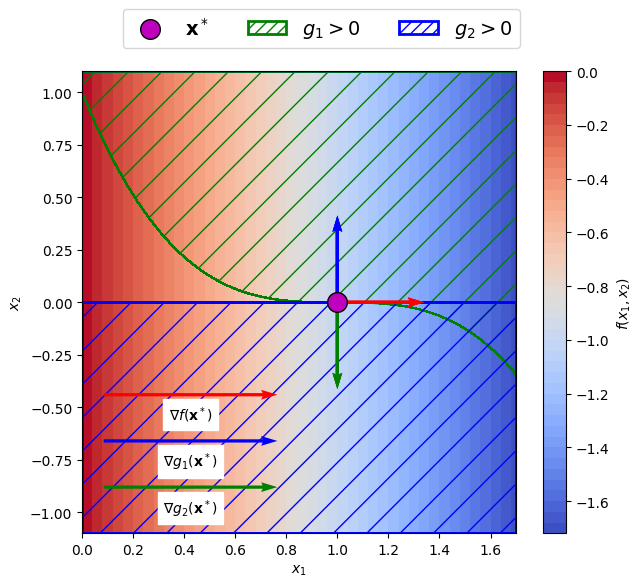

In [220]:
# Objective Function and Constraints Visualization:
def constraint_color(cf,color):
    # https://github.com/matplotlib/matplotlib/issues/2789/#issuecomment-604599060
    for i, collection in enumerate(cf.collections):
        collection.set_edgecolor(color)

# Optimal point obtained from the optimization process
x_opt = [1., 0.]

# Define a grid for x1 and x2 values
# Define the objective function surface
X1,X2 = np.meshgrid(np.linspace(0,1.7,40),np.linspace(-1.1,1.1,40))

# Objective Function
F = -X1

handles = []; labels = []

# Define gradient vectors for the objective function and constraints at the optimal point
origin = np.array([x_opt]*3).T # origin point
vectors = np.array([[1,0],[0,1],[0,-1]])

# Initialize the figure and axis for the plot
fig, ax = plt.subplots(figsize=(7,6))
# Contour plot for the objective function with colormap "coolwarm"
cf = ax.contourf(X1, X2, F,cmap="coolwarm",levels=50,zorder=-1)
# Plot the optimal point as a magenta circle
opt = ax.scatter([x_opt[0],], [x_opt[1],], s = 200, marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)

# Plot gradient vectors with labels for objective function and constraints
# Red arrow: Gradient of the objective function at the optimal point
Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=5, zorder=2)
qk = ax.quiverkey(Q, 0.25, 0.3, 2, r"$\nabla f(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
# Blue arrow: Gradient of the first constraint at the optimal point
Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=5, zorder=2)
qk=ax.quiverkey(Q, 0.25, 0.2, 2, r"$\nabla g_1(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
# Green arrow: Gradient of the second constraint at the optimal point
Q = ax.quiver(*origin, vectors[2:3,0], vectors[2:3,1], color=['g'], scale=5, zorder=2)
qk=ax.quiverkey(Q, 0.25, 0.1, 2, r"$\nabla g_2(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
fig.colorbar(cf, ax=ax, orientation='vertical', label=r"$f(x_1,x_2)$")
handles += [opt]
labels += [r"$\mathbf{x}^*$"]

# Define constraint functions G1 and G2
G1 = X2 - (1-X1)**3
G2 = -X2
# Contour plots for constraints with hatching to indicate regions where constraints are satisfied

# Green hatching: Satisfies the G1 constraint
cf = plt.contourf(X1, X2, G1, levels=[-200, 0, 200], colors='none',hatches=[None, '/'],extend='lower')
constraint_color(cf,'g')
a_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, edgecolor='g', facecolor='none', fill='None', hatch='///')
handles += [a_hatch]
labels += [r"$g_1>0$"]

# Blue hatching: Satisfies the G2 constraint
cf = plt.contourf(X1, X2, G2, levels=[-200, 0, 200], colors='none',hatches=[None, '/'],extend='lower')
constraint_color(cf,'b')
a_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, edgecolor='b', facecolor='none', fill='None', hatch='///')

# Create legend handles and labels for the optimal point and constraint regions
handles += [a_hatch]
labels += [r"$g_2>0$"]

# Display the legend with specified handles and labels
lx = fig.legend(handles, labels, loc='upper center', ncol=3, fontsize = 14)
# fig.savefig("irregular_point.pdf",bbox_inches="tight")

# Show the plot
plt.show()

### ANSWERS

a)
Due to the linearly dependent gradients of the constraint functions (having a rank of 1 instead of 2), and the gradient vector not being full rank at the point (1, 0), the presence of Lagrange multipliers is not applicable to this problem.


b)
Not possible
The figure illustrates that at the point (1, 0), the gradients of both constraint functions are orthogonal to the gradient of the objective function. Hence, it is impossible to express the gradient of the objective function as a linear combination of the constraint gradients.

## Q2)
Determine the kkt points for the following CNOP.Check if they give local minimum points.

a)
$$
\begin{array}{cl}
\underset{x_1, x_2, x_3}{\operatorname{minimize}} & f\left(x_1, x_2, x_3\right)=-3 x_1+x_2-x_3^2 \\
\text { subject to } & g\left(x_1, x_2, x_3\right)=x_1+x_2+x_3 \leq 0 \\
& h\left(x_1, x_2, x_3\right)=-x_1+2 x_2+x_3^2=0
\end{array}
$$
b)
$$
\begin{array}{ll}
\underset{x_1, x_2, x_3}{\operatorname{minimize}} & f(x)=x_1^2+x_2^2+x_3^2 \\
\text { subject to } & h_1(x)=\frac{x_1^2}{4}+\frac{x_2^2}{5}+\frac{x_3^2}{25}-1=0 \\
& h_2(x)=x_1+x_2-x_3=0
\end{array}
$$

### a)

In [221]:
#a)
import sympy as sym
from IPython.display import display, Latex

# Define symbolic variables
x1, x2, x3 = sym.symbols("x_1 x_2 x_3")
m = sym.Symbol(r"\mu")
l = sym.Symbol(r"\lambda")

# Define the objective function and constraints
# Objective function
f = -3*x1 + x2 - x3**2
# Constraint g & h
g = x1 + x2 + x3
h = -x1 + 2*x2 + x3**2

# Define the Lagrangian function L = f + m*g + l*h
L = f + m*g + l*h
# Display the Lagrangian equation in LaTeX format
display(Latex(r"$L=$"),L)
# print(latex(L))

# Calculate and display the gradient of the Lagrangian
dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

# Calculate and display the Hessian matrix (second derivative) of the Lagrangian
dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)
# print(latex(dL2))

# Define the KKT conditions as a tuple: partial derivatives of L with respect to x1, x2, x3, m*g, and l*h
kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), m*g, l*h)
# Solve the KKT conditions for x1, x2, x3, m, and l
sol = sym.solve(kkt,(x1,x2,x3,m,l))
# Display the solution in LaTeX format
display(Latex("$"+latex(sol[0])+"$"))

<IPython.core.display.Latex object>

\lambda*(-x_1 + 2*x_2 + x_3**2) + \mu*(x_1 + x_2 + x_3) - 3*x_1 + x_2 - x_3**2

<IPython.core.display.Latex object>

Matrix([
[         -\lambda + \mu - 3],
[        2*\lambda + \mu + 1],
[2*\lambda*x_3 + \mu - 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[0, 0,             0],
[0, 0,             0],
[0, 0, 2*\lambda - 2]])

<IPython.core.display.Latex object>

ANSWERS

a)
$$
\begin{aligned}
& \nabla L=\left[\begin{array}{c}
-\lambda+\mu-3 \\
2 \lambda+\mu+1 \\
2 \lambda x_3+\mu-2 x_3
\end{array}\right]_{\left(\frac{-115}{58,}, \frac{-95}{588}, \frac{5}{14}, \frac{5}{3}, \frac{-4}{3}\right)}=0 \\
& \nabla^2 \mathrm{~L}=\left[\begin{array}{ccc}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 2 \lambda-2
\end{array}\right]_{\left(\frac{-115}{588^{\prime}}, \frac{-95}{588^8}, \frac{5}{14}, \frac{5}{3^{\prime}}, \frac{-4}{3}\right)}=\left[\begin{array}{ccc}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & \frac{-14}{3}
\end{array}\right]
\end{aligned}
$$

Substituting KKT points give $\nabla \mathrm{L}=0$, which satisfies the FONC. Therefore there exist a regular point $x^*$ in $\left(\frac{-115}{58}, \frac{-95}{588}, \frac{5}{14}, \frac{5}{3}, \frac{-4}{3}\right)$
$\nabla^2 \mathrm{~L}$ is negative semi definite since the eigen values are 0,0 , and $\frac{-14}{3}$. Therefore the function don't give a local minimum point under KKT points $\left(\frac{-115}{58,}, \frac{-95}{588}, \frac{5}{14}, \frac{5}{3}, \frac{-4}{3}\right)$

### b)

In [222]:
#b)
# Import required libraries
import sympy as sym
from IPython.display import display, Latex

# Define symbolic variables
x1, x2, x3 = sym.symbols("x_1 x_2 x_3")
l1 = sym.Symbol(r"\lambda_1")
l2 = sym.Symbol(r"\lambda_2")

# Define objective function
f = x1**2 + x2**2 + x3**2
# Define and constraints
h1 = (x1**2)/4 + (x2**2)/5 + (x3**2)/25 -1
h2 = x1 + x2 - x3

# Define the Lagrangian
L = f + l1*h1 + l2*h2
# Display the Lagrangian equation in LaTeX format
display(Latex(r"$L=$"),L)
# print(latex(L))

# Calculate and display the gradient of the Lagrangian
dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))


# Calculate and display the Hessian matrix (second derivative) of the Lagrangian
dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)
# print(latex(dL2))

# Define the KKT conditions as a tuple: partial derivatives of L with respect to x1, x2, x3, l1*h1, and l2*h2
kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), l1*h1, l2*h2)

# Solve the KKT conditions for x1, x2, x3, l1, and l2
sol = sym.solve(kkt,(x1,x2,x3,l1, l2))

# Iterate through solutions and display them
for i,s in enumerate(sol):
    print("===================================")
    print("Solution %i:"%(i+1))
    display(Latex("$"+latex(s)+"$"))
    # print(latex(sym.simplify(s)))
    x_sol = [i.evalf() for i in s]
    print("x_sol =",x_sol)
    f_sol = f.subs({x1:x_sol[0], x2:x_sol[1], x3:x_sol[2]})
    print("f =", f_sol)

    # Check for invalid multipliers
    if any([m < 0 for m in []]):
        print("INVALID MULTIPLIERS")
    elif any([l == 0 for l in [s[3]]]):
        print("INVALID MULTIPLIERS")

<IPython.core.display.Latex object>

\lambda_1*(x_1**2/4 + x_2**2/5 + x_3**2/25 - 1) + \lambda_2*(x_1 + x_2 - x_3) + x_1**2 + x_2**2 + x_3**2

<IPython.core.display.Latex object>

Matrix([
[   \lambda_1*x_1/2 + \lambda_2 + 2*x_1],
[ 2*\lambda_1*x_2/5 + \lambda_2 + 2*x_2],
[2*\lambda_1*x_3/25 - \lambda_2 + 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[\lambda_1/2 + 2,                 0,                  0],
[              0, 2*\lambda_1/5 + 2,                  0],
[              0,                 0, 2*\lambda_1/25 + 2]])

Solution 1:


<IPython.core.display.Latex object>

x_sol = [0, 0, -5.00000000000000, -25.0000000000000, 0]
f = 25.0000000000000
Solution 2:


<IPython.core.display.Latex object>

x_sol = [0, 0, 5.00000000000000, -25.0000000000000, 0]
f = 25.0000000000000
Solution 3:


<IPython.core.display.Latex object>

x_sol = [-1.02597835208515, -1.53896752812773, -2.56494588021289, -10.0000000000000, -3.07793505625546]
f = 10.0000000000000
Solution 4:


<IPython.core.display.Latex object>

x_sol = [1.02597835208515, 1.53896752812773, 2.56494588021289, -10.0000000000000, 3.07793505625546]
f = 10.0000000000000
Solution 5:


<IPython.core.display.Latex object>

x_sol = [0, -2.23606797749979, 0, -5.00000000000000, 0]
f = 5.00000000000000
Solution 6:


<IPython.core.display.Latex object>

x_sol = [0, 2.23606797749979, 0, -5.00000000000000, 0]
f = 5.00000000000000
Solution 7:


<IPython.core.display.Latex object>

x_sol = [-1.57377895072927, 1.37705658188811, -0.196722368841158, -4.41176470588235, -0.324013313385437]
f = 4.41176470588235
Solution 8:


<IPython.core.display.Latex object>

x_sol = [1.57377895072927, -1.37705658188811, 0.196722368841158, -4.41176470588235, 0.324013313385437]
f = 4.41176470588235
Solution 9:


<IPython.core.display.Latex object>

x_sol = [-2.00000000000000, 0, 0, -4.00000000000000, 0]
f = 4.00000000000000
Solution 10:


<IPython.core.display.Latex object>

x_sol = [2.00000000000000, 0, 0, -4.00000000000000, 0]
f = 4.00000000000000
Solution 11:


<IPython.core.display.Latex object>

x_sol = [0, 0, 0, 0, 0]
f = 0
INVALID MULTIPLIERS


ANSWERS

b)

* Solution 1

$\nabla \mathrm{L}=0$
Eigen values of $\nabla^2 \mathrm{~L}=0.0,0.4,1.68$
$\therefore \nabla^2 \mathrm{~L}$ is positive semi definite
Can't take as a minimum point since this has zero eigen value.

* Solution 2

$\nabla \mathrm{L}=0$
Eigen values of $\nabla^2 \mathrm{~L}=-10.5,-8,0$
$\therefore \nabla^2 \mathrm{~L}$ is negative semi definite
Can't take as a minimum point since this has zero and negative eigen values.

* Solution 3

Gives invalid multiples
Can't take as a minimum point since this point doesnt satisfy the KKT necessary conditions.

* Solution 4

$\nabla \mathrm{L}=0$
Eigen values of $\nabla^2 \mathrm{~L}=-10.5,-8,0$
$\therefore \nabla^2 \mathrm{~L}$ is negative semi definite
Can't take as a minimum point since this has zero and negative eigen values.

* Solution 5

$\nabla \mathrm{L}=0$
Eigen values of $\nabla^2 \mathrm{~L}=-0.5,0,1.6$
$\therefore \nabla^2 \mathrm{~L}$ is not positive semi definite
Can't take as a minimum point since this has zero and negative eigen values.

* Solution 6

$\nabla \mathrm{L}=0$
Eigen values of $\nabla^2 \mathrm{~L}=-0.5,0,1.6$
$\therefore \nabla^2 \mathrm{~L}$ is not positive semi definite
Can't take as a minimum point since this has zero and negative eigen values.

* Solution 7

$\nabla \mathrm{L}=0$
Eigen values of $\nabla^2 \mathrm{~L}=0,0.4,1.68$
$\therefore \nabla^2 \mathrm{~L}$ is positive semi definite
Can't take as a minimum point since this has zero eigen value.

* Solution 8

$$
\nabla \mathrm{L}=0
$$

Eigen values of $\nabla^2 \mathrm{~L}=-0.20588,0.2353,1.6470$
$\therefore \nabla^2 \mathrm{~L}$ is not positive semi definite
Can't take as a minimum point since this has negative eigen value.

* Solution 9

$$
\nabla \mathrm{L}=0
$$

Eigen values of $\nabla^2 \mathrm{~L}=-0.20588,0.2353,1.6470$
$\therefore \nabla^2 \mathrm{~L}$ is not positive semi definite
Can't take as a minimum point since this has negative eigen value.

* Solution 10

$$
\nabla \mathrm{L}=0
$$

Eigen values of $\nabla^2 \mathrm{~L}=-3,-2,1.2$
$\therefore \nabla^2 \mathrm{~L}$ is not positive semi definite
Can't take as a minimum point since this has negative eigen value.

* Solution 11

$$
\nabla \mathrm{L}=0
$$

Eigen values of $\nabla^2 \mathrm{~L}=-3,-2,1.2$
$\therefore \nabla^2 \mathrm{~L}$ is not positive semi definite
Can't take as a minimum point since this has negative eigen value.

## PART 2

Optimization using scipy

Consider the following optimization problem
$$
\min f(x)=-\left(2 x_1 x_2+2 x_1-x_1^2-2 x_2^2\right)
$$
subject to
$$
\begin{gathered}
x_2-\left(x_1-1\right)^4-2 \geq 0 \\
x_1^3-x_2=0
\end{gathered}
$$

With bounds

\begin{aligned}
& 0.5 \leq x_1 \leq 1.5 \\
& 1.5 \leq x_2 \leq 2.5
\end{aligned}


In [223]:
#Define objective function
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

[0, 3, 0, 3]

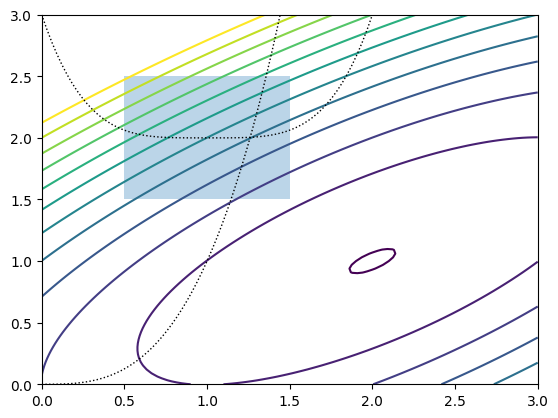

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# Generate grid points for x and y
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)

Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
# Plot contours of the objective function
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));

# Plot constraints: x^3 and (x-1)^4+2
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)

# Fill the feasible region between the constraints
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])
[0, 3, 0, 3]



In [225]:

cons = ({'type': 'eq',# Specifies an equality constraint
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),# Equality constraint function: x[0]**3 - x[1] = 0
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},# Jacobian of the equality constraint
        {'type': 'ineq',# Specifies an inequality constraint
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])}) # Inequality constraint function: x[1] - (x[0]-1)**4 - 2 >= 0

# Variable Bounds:
# Define bounds for the variables:
# - x[0] is constrained to be between 0.5 and 1.5
# - x[1] is constrained to be between 1.5 and 2.5

bnds = ((0.5, 1.5), (1.5, 2.5))

In [226]:
x0 = [3, 4]

In [227]:
import scipy.optimize as scipy_opt

ux = scipy_opt.minimize(f, x0, constraints=None)
ux

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.9999999999999392
        x: [ 2.000e+00  1.000e+00]
      nit: 6
      jac: [-2.086e-07 -1.788e-07]
 hess_inv: [[ 9.895e-01  4.933e-01]
            [ 4.933e-01  4.957e-01]]
     nfev: 21
     njev: 7

In [228]:
cx = scipy_opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.0499154720914454
       x: [ 1.261e+00  2.005e+00]
     nit: 4
     jac: [-3.487e+00  5.497e+00]
    nfev: 13
    njev: 4

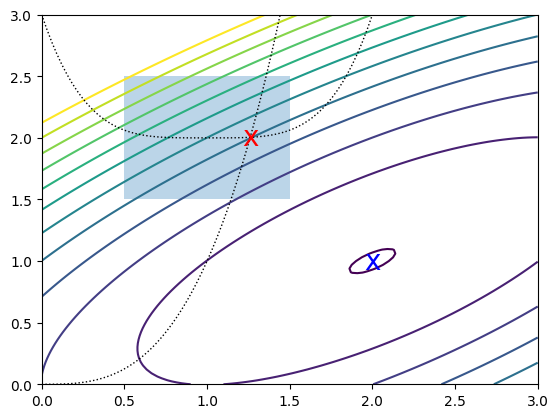

In [229]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);

## activity 1

a) Is the inequality constraint active?

b) Is it possible to find the Lagrange multipliers for this problem?

In [230]:
# Define the objective function
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

# Define the inequality constraint function
def constraint_ineq(x):
    return x[1] - (x[0] - 1)**4 - 2

# Define the equality constraint function
def constraint_eq(x):
    return x[0]**3 - x[1]

# Define the bounds for x1 and x2
bounds = [(0.5, 1.5), (1.5, 2.5)]

# Define the initial guess for x
x0 = [3, 4]

# Define the Lagrange multiplier constraint function
def lagrange_constraint(x):
    return np.array([1, 1])  # Assuming there are two constraints

# Define the Lagrange multiplier bounds
lagrange_bounds = [(0, None), (0, None)]  # Non-negative Lagrange multipliers

# Define the overall constraints including Lagrange multiplier constraints
constraints = [
    {'type': 'ineq', 'fun': constraint_ineq},
    {'type': 'eq', 'fun': constraint_eq},
    {'type': 'ineq', 'fun': lagrange_constraint}
]

# Solve the optimization problem
res = scipy_opt.minimize(f, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the Lagrange multipliers
lagrange_multipliers = res['x'][2:]  # Exclude the decision variables

print(res)
print(lagrange_multipliers)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.049915472091458
       x: [ 1.261e+00  2.005e+00]
     nit: 4
     jac: [-3.487e+00  5.497e+00]
    nfev: 13
    njev: 4
[]


In [231]:
# Define the Lagrangian and its gradient
import sympy as sym
from sympy import pprint, latex, root
from IPython.display import display, Latex

x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
m1 = sym.Symbol(r"\mu_1")
m2 = sym.Symbol(r"\mu_2")
f = -(2*x1*x2 + 2*x1 - x1**2 - 2*x2**2)
g = x2 - (x1 - 1)**4 - 2
h = x1**3 - x2
L = f + m*g + l*h
display(Latex(r"$L=$"),L)

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)]])
display(Latex(r"$\nabla L=$"),dL)

<IPython.core.display.Latex object>

\lambda*(x_1**3 - x_2) + \mu*(x_2 - (x_1 - 1)**4 - 2) + x_1**2 - 2*x_1*x_2 - 2*x_1 + 2*x_2**2

<IPython.core.display.Latex object>

Matrix([
[3*\lambda*x_1**2 - 4*\mu*(x_1 - 1)**3 + 2*x_1 - 2*x_2 - 2],
[                           -\lambda + \mu - 2*x_1 + 4*x_2]])

In [232]:
#The gradients of the constraints
dg = sym.Matrix([[sym.diff(g,x1),sym.diff(g,x2)]])
dh = sym.Matrix([[sym.diff(h,x1),sym.diff(h,x2)]])
display(Latex(r"$\nabla \mathbf{g}=$"),dg)
display(Latex(r"$\nabla \mathbf{h}=$"),dh)
display(Latex(r"$\nabla \mathbf{g}(1.261,2.005)=$"),dg.subs({x1:1.261,x2:2.005}))
display(Latex(r"$\nabla \mathbf{h}(1.261,2.005)=$"),dh.subs({x1:1.261,x2:2.005}))
dot_product = np.dot(dg.subs({x1:1.261,x2:2.005}),dh.subs({x1:1.261,x2:2.005}).T)
print("Dot product ∇g.∇h =",dot_product)

<IPython.core.display.Latex object>

Matrix([[-4*(x_1 - 1)**3, 1]])

<IPython.core.display.Latex object>

Matrix([[3*x_1**2, -1]])

<IPython.core.display.Latex object>

Matrix([[-0.0711183239999999, 1]])

<IPython.core.display.Latex object>

Matrix([[4.770363, -1]])

Dot product ∇g.∇h = [[-1.33926022143161]]


$$
\begin{aligned}
& \nabla \mathbf{g}= \\
& {\left[\begin{array}{ll}
-4\left(x_1-1\right)^3 & 1
\end{array}\right]} \\
& \nabla \mathbf{h}= \\
& {\left[\begin{array}{ll}
3 x_1^2 & -1
\end{array}\right]} \\
& \nabla \mathbf{g}(1.261,2.005)= \\
& {\left[\begin{array}{ll}
-0.0711183239999999 & 1
\end{array}\right]} \\
& \nabla \mathbf{h}(1.261,2.005)= \\
& {\left[\begin{array}{ll}
4.770363 & -1
\end{array}\right]} \\
& \text { Dot product } \nabla \mathrm{g} . \nabla \mathrm{h}=\left[\begin{array}{ll}
-1.33926022143161
\end{array}\right]
\end{aligned}
$$


### ANSWERS : ACTIVITY 1
a) Given that the inequality constraint is active, its removal would have an impact on the optimal solution.

b)No

## activity 2

For the following problem use scipy.optimize to find a solution.
$$
\min f(x)=\left(x_1-1\right)^2+x_2-2
$$

Subject to
$$
\begin{aligned}
& h(x)=x_2-x_1-1=0 \\
& g(x)=x_1+x_2-2 \leq 0
\end{aligned}
$$

Identify the active constraints.

In [233]:
#objective function
def f(x):
    return (x[0]-1)**2 + x[1] - 2

(-2.0, 3.0, -3.0, 3.0)

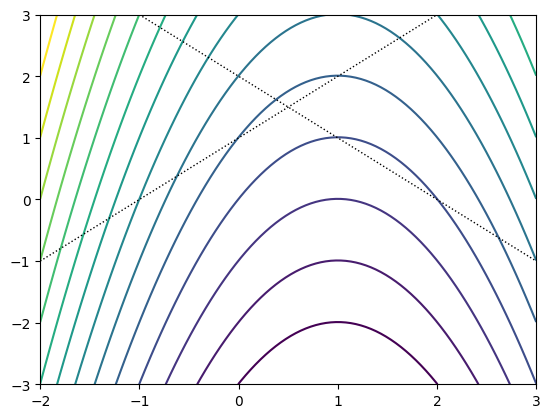

In [234]:
#contours of the objective function and the constraints
x = np.linspace(-2, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-3.99,10, 1));
plt.plot(x, x+1, 'k:', linewidth=1)
plt.plot(x, -x+2, 'k:', linewidth=1)
plt.axis([-2,3,-3,3])

In [235]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[1] - x[0] - 1]),
         'jac' : lambda x: np.array([-1.0, 1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[0] + x[1] -2 ])})

In [236]:
x0 = [3, 4]

In [237]:
ux = scipy_opt.minimize(f, x0, constraints=None)
ux

  message: Maximum number of iterations has been exceeded.
  success: False
   status: 1
      fun: -3.652863513949983e+99
        x: [-6.044e+49 -7.306e+99]
      nit: 400
      jac: [-1.209e+50  1.000e+00]
 hess_inv: [[ 5.000e-01  1.059e+50]
            [ 1.059e+50  2.560e+100]]
     nfev: 1206
     njev: 402

In [238]:
cx = scipy_opt.minimize(f, x0, bounds=bnds, constraints=cons)
print(cx)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.25
       x: [ 5.000e-01  1.500e+00]
     nit: 2
     jac: [-1.000e+00  1.000e+00]
    nfev: 6
    njev: 2


(-2.0, 3.0, -3.0, 3.0)

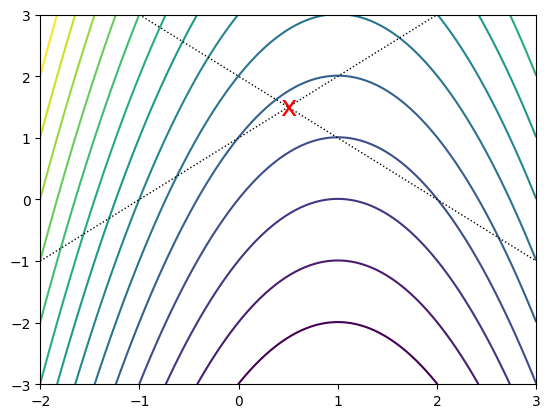

In [239]:
x = np.linspace(-2, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-3.99,10, 1));
plt.plot(x, x+1, 'k:', linewidth=1)
plt.plot(x, -x+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.axis([-2,3,-3,3])

### ANSWERS : ACITIVITY 2

Optimum point solution from scipy.optimize $x:[0.5,1.5]$

from optimized objective function, value minimized to -0.25
$$
\begin{aligned}
& h(0.5,1.5)=0 \\
& g(0.5,1.5)=0
\end{aligned}
$$
$h(x)$ and $g(x)$ satisfies both constraints and lies on the constraint boundaries.

$\therefore$ both equality and inequality constraints are active.

Active Constraints ->
$$
\begin{aligned}
& g(x)=x 1+x 2-2 \leq 0 \\
& h(x)=x 2-x 1-1=0
\end{aligned}
$$